In [8]:
import numpy as np
%display latex
from scipy import constants

pi = constants.pi
hbar = 1
x, t = var('x', 't')
Psi = var('Psi')
assume(x, 'real')
assume(t, 'real')

The Wave function in the infinite square well is given by:

$V(x)=\begin{cases}0, 0\leq x\leq a\\ \infty, otherwise\end{cases}$

$\Psi_n(x,t)=\psi_n(x)\cdot\varphi_n(t)$

$\psi_n(x)=\sqrt{\frac2a}\cdot sin(\frac{n\pi}{a}x)$

$\varphi_n(t)=e^{\frac{-iE_n}{\hbar}t}$

$E_n=\frac{n^2\pi^2\hbar^2}{2ma^2}$

In total $\Psi$ can be calculated in the following way:

$\Psi(x,t)=\sum\limits_{n=1}^\infty c_n\Psi_n(x,t)$

with:

$c_n = \int\limits_{-\infty}^\infty \psi_n(x)^*\cdot\Psi(x,0)dx$

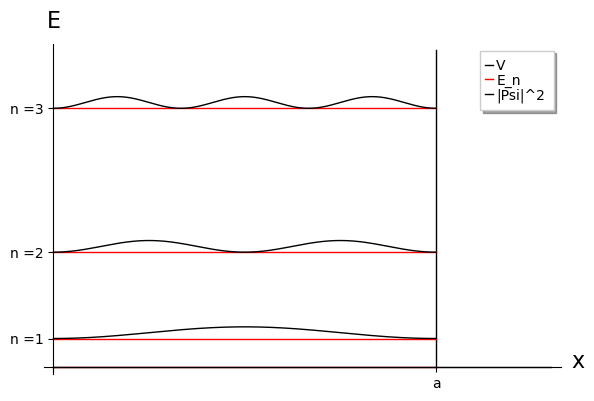

Animation with 128 frames
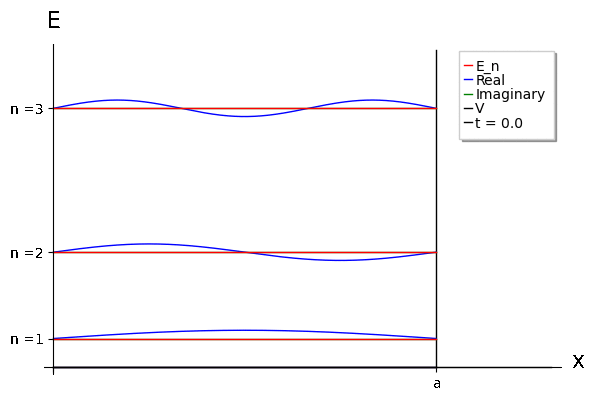

In [13]:

    

t_val = 0
n = 1
a = 1
m = 1

n_max = 3
E_max = (n_max^2*pi^2*hbar^2)/(2*m*a^2)

#markers on x-axis
x_marks = [0,a]
x_marks = [float(i) for i in x_marks]
x_names = ['0', 'a']

#markers on y axis
y_marks = []
y_names = []
for n in range(1,n_max+1):
    y_marks.append((n^2*pi^2*hbar^2)/(2*m*a^2))
    y_names.append("n =" + str(n))

y_marks = [float(i) for i in y_marks]


colors = ['black', 'red', 'blue', 'green']

#set up static image of probability density |Psi|^2
S = line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V')
S += plot(0, (0,a), color = colors[1], legend_label = 'E_n') + plot(0, (0,1.3*a), legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names])


#set up the legend once so it doesnt repeat the same for different n
P = animate([plot(0, (0,a), legend_label = 'E_n', color = colors[1]) + plot(0, (0,a), color = colors[2], legend_label = 'Real') + plot(0, (0,a), color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
for i in range(len(P)):
    P[i].set_legend_options(loc=1)



#Potential V + time tracker 0 line with ticks and axis lables.
P += animate([line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V') + plot(0, (0,1.3*a), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )

#calculate animations for different n
for n in range(1,n_max+1):
    
    E = (n^2*pi^2*hbar^2)/(2*m*a^2)
    psi = sqrt(2/a)*sin(n*pi*x/a)
    phi = e^(-I*E*t/hbar)
    
    eqAbs = Psi*Psi.conjugate() == psi*phi*psi*phi.conjugate()
    eqRe = Psi == psi*phi.real()
    eqIm = Psi == psi*phi.imag()
    S += plot(E, (0,a), color = colors[1]) + plot(eqAbs.rhs()+E, (0,a), color = 'black')
    P += animate([plot(eqRe.rhs()(t=t_val)+E, (x, 0, a), color = colors[2]) + plot(eqIm.rhs()(t=t_val)+E, (x,0,a), color = colors[3]) + plot(E, (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
show(S)
P.show(delay=2)

Now that we have visualized the static solutions to the Schrödinger Equation, we can move on to create non-static solutions, that are linear combinations of the static ones.

We will not automatically solve the probabilities for each static solution by the method described above, since we would need a initial condition $\Psi(x,0)$ and depending on that, the solutions change. Instead we are going to assume that all solutions are equally likely. Later we can make this more general, but for now it will suffice to create first moving wave functions, meaning $\langle p\rangle\neq0$. 

So we have the two conditions:

$c_n = c$

$\sum\limits_{n=1}^N|c_n|^2\stackrel{!}{=}1$

$\implies c=\frac{1}{\sqrt{N}}$

The Expectation value for the Energy can be calculated as:

$\langle \hat{H}\rangle = \sum\limits_{n=1}^N|c_n|^2E_n=\frac{\pi^2\hbar^2}{2mNa^2}\sum\limits_{n=1}^Nn^2=\frac{\pi^2\hbar^2}{2mNa^2}\frac{N(N+1)(2N+1)}{6}=\frac{\pi^2\hbar^2(N+1)(2N+1)}{12ma^2}$

Animation with 128 frames
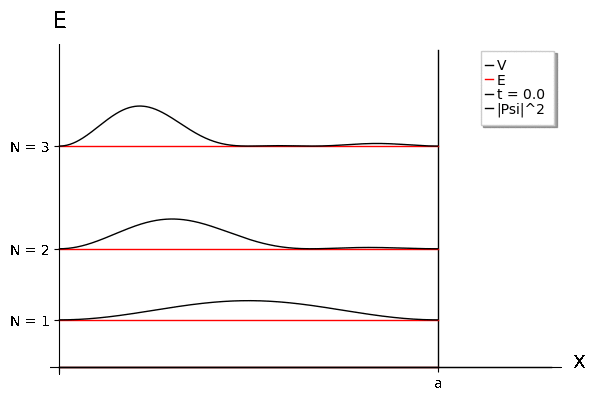

Animation with 128 frames
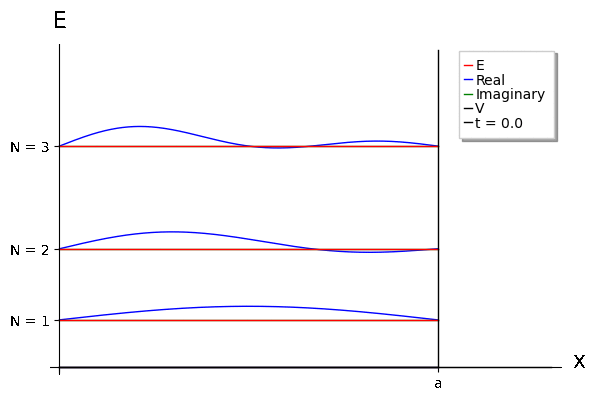

In [2]:
def lincomb(N, m, a):
    E_max = (pi^2*(N+1)*(2*N+1))/(12*m*a^2)
    E = [0]
    c = [0]
    
    eqRe = Psi.real() == 0
    eqIm = Psi.imag() == 0
    eqPro = Psi == 0
    eqCon = Psi.conjugate() == 0
    
    colors = ['black', 'red', 'blue', 'green']
    #markers on x-axis
    x_marks = [0,a]
    x_marks = [float(i) for i in x_marks]
    x_names = ['0', 'a']
    
    
    
    S = animate([line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
       
    P = animate([plot(0, (0,a), legend_label = 'E', color = colors[1]) + plot(0, (0,a), color = colors[2], legend_label = 'Real') + plot(0, (0,a), color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    for i in range(len(P)):
        P[i].set_legend_options(loc=1)
        S[i].set_legend_options(loc=1)
        
       
    Re = [0]
    Im = [0]
    Pro = [0]
    Con = [0]
    #SArr = [None]
    #PArr = [None]
    for n in range(1, N+1):
        #defining energy and wavefunction for current n
        En = (n^2*pi^2*hbar^2)/(2*m*a^2)
        E.append((pi^2*(n+1)*(2*n+1))/(12*m*a^2))
        c.append(1/sqrt(n))
        psi = sqrt(2/a)*sin(n*pi*x/a)
        phi = e^(-I*En*t/hbar)
        
        #adding the wavefunction to the corresponding array
        Re.append(Re[n-1] + psi*phi.real())
        Im.append(Im[n-1] + psi*phi.imag())
        Pro.append(Pro[n-1] + psi*phi)
        Con.append(Con[n-1] + psi*phi.conjugate())
        # adding the wave function to the eqution (old version)
        #eqRe = eqRe.lhs() == eqRe.rhs()+c*psi*phi.real()
        #eqIm = eqIm.lhs() == eqIm.rhs()+c*psi*phi.imag()
        #eqPro = eqPro.lhs() == eqPro.rhs()+c*psi*phi
        #eqCon = eqCon.lhs() == eqCon.rhs()+c*psi*phi.conjugate()
        
    for n in range(1, N+1):
        P += animate([plot(c[n]*Re[n](t=t_val)+E[n], (x, 0, a), color = colors[2]) + plot(c[n]*Im[n](t=t_val)+E[n], (x,0,a), color = colors[3]) + plot(E[n], (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
        S += animate([plot(E[n], (0,a), color = colors[1]) + plot((c[n]*Pro[n]*c[n]*Con[n]).real()(t=t_val)+E[n], (0,a), color = 'black') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
            
    #markers on y axis
    y_marks = E[1:]
    y_marks = [float(i) for i in y_marks]
    y_names = []
    for i in range(1,N+1):
        y_names.append('N = ' + str(i))
    
    S += animate([plot(0, (0,a), color = colors[1], legend_label = 'E') + plot(0, (0,a), color = 'black', legend_label = 't = ' + str(round(t_val,2))) + plot(0, (0,1.3*a), legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    P += animate([line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V') + plot(0, (0,1.3*a), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
    
    
    #eqAbs = eqPro*eqCon
    #S += animate([plot(E, (0,a), color = colors[1]) + plot(eqAbs.rhs().real()(t=t_val)+E, (0,a), color = 'black') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    #P += animate([plot(eqRe.rhs()(t=t_val)+E, (x, 0, a), color = colors[2]) + plot(eqIm.rhs()(t=t_val)+E, (x,0,a), color = colors[3]) + plot(E, (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
    return S, P

(lincomb(3, 1, 1)[0]).show(delay = 2)
(lincomb(3, 1, 1)[1]).show(delay = 2)

Now we want to be able to choose any initial condition $\Psi(x,0)$ and construct the Wavefunction $\Psi(x,t)$ using:  
$\Psi(x,t)=\sum\limits_{n=1}^\infty c_n\Psi_n(x,t)$  
$c_n = \int\limits_{-\infty}^\infty\psi_n^*(x)\Psi(x,0)dx$

We will rely on SageMath to compute $c_n$ for any given $\Psi(x,0)$.  

Step 1: calculate $\Psi_n(x,t)$ for all $n$ up to some $N$.  
Step 2: calculate the corresponding $c_n$ for each $\Psi_n$.  
Step 3: put it all together using the first formula and animate.  

Animation with 128 frames
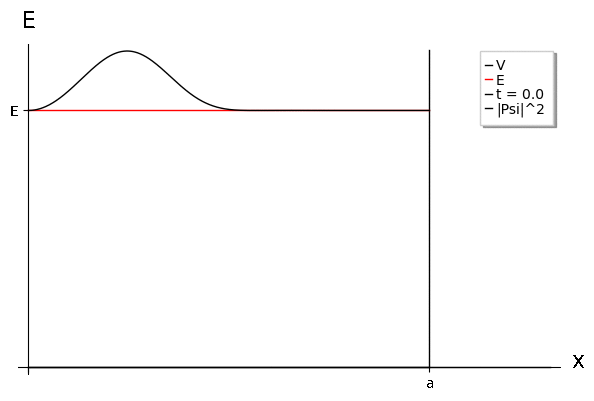

In [38]:
def Innit(m, a):
    E_max = 0
    
    #this specific function is supposed to be 0 for x>a/2, thats why numerical integration goes to a/2 and not a.
    f = 48/a^3*x*(a/2-x)
    
    N = 5
    
    E = [0]
    c = [0]
    
    colors = ['black', 'red', 'blue', 'green']
    #markers on x-axis
    x_marks = [0,a]
    x_marks = [float(i) for i in x_marks]
    x_names = ['0', 'a']
    
           
    #P = animate([plot(0, (0,a), legend_label = 'E', color = colors[1]) + plot(0, (0,a), color = colors[2], legend_label = 'Real') + plot(0, (0,a), color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    #for i in range(len(P)):
    #    P[i].set_legend_options(loc=1)
    #    S[i].set_legend_options(loc=1)
    
    Re = [0]
    Im = [0]
    Pro = [0]
    Con = [0]
    
    for n in range(1, N+1):
        En = (n^2*pi^2*hbar^2)/(2*m*a^2)
        E.append(En)
        
        psi = sqrt(2/a)*sin(n*pi*x/a)
        phi = e^(-I*En*t/hbar)
        
        Re.append(psi*phi.real())
        Im.append(psi*phi.imag())
        Pro.append(psi*phi)
        Con.append(psi*phi.conjugate())
        
        c.append(numerical_integral(psi*f, 0, a/2)[0])
    
    eqRe = Psi.real() == 0
    eqIm = Psi.imag() == 0
    eqPsi = Psi == 0
    
    for n in range(1,N+1):
        eqRe = eqRe.lhs() == eqRe.rhs() + c[n]*Re[n]
        eqIm = eqIm.lhs() == eqIm.rhs() + c[n]*Im[n]
        eqPsi = eqPsi.lhs() == eqPsi.rhs() + c[n]*Pro[n]
        E_max += c[n]^2*E[n]
    
    #markers on x-axis
    y_marks = [E_max]
    y_marks = [float(i) for i in y_marks]
    y_names = ['E']
    
    S = animate([line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    S += animate([plot(E_max, (0,a), color = colors[1], legend_label = 'E') + plot(0, (0,a), color = 'black', legend_label = 't = ' + str(round(t_val,2))) + plot(0, (0,1.3*a), legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    S += animate([plot((eqPsi.rhs()(t=t_val)*eqPsi.rhs()(t=t_val).conjugate()).real()+E_max, (0,a), color = colors[0]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    
    return S
        
Innit(1,1).show()
    

In [29]:
#specific function
a=1
show(numerical_integral(48/a^3*x*(a/2-x),0,0.5))

(0.9999999999999998, 1.1102230246251562e-14)